In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

# Data Visualization With Python 

<!-- PELICAN_BEGIN_SUMMARY -->

Data visualizations and static or interactive visualizations are one of the data analysis tools to helping identify outliers
or data transformations and ideals for financial models.

The maximum number of data series per chart in Excel is 255, so using Python to plot a huge dataset is very useful.
<!-- PELICAN_END_SUMMARY -->

**Goal: Use Python to read Excel file and plot visualization chart for financial analysis**<br> -Example file - Visualize popluation and life expectancy comparison between US and Japan from 1960 to 2017

<br>
**Visualize the data**
    - compare US and Japan life Expectany from 1960 to 2017
    - After initial data analysis, sometime we need to reshape the data for further analaysis
    - We can reshape the data format to set index for visualization
    - The maximum number of data series per chart in Excel is 255, this data has 264 columns as data series

In [2]:
dfr = pd.read_excel('data/Plot1/LifeChart.xlsx')
year = dfr['Date']
country = dfr.loc[:,'Japan':'Zimbabwe']  
print (country[0:2])

       Japan  Kazakhstan      Kenya  Kyrgyz Republic   Cambodia   Kiribati  \
0  67.666098   58.367585  46.362415        56.128073  41.232024  49.215976   
1  68.310000   58.781585  47.013000        56.564122  41.357683  49.743683   

   St. Kitts and Nevis  Korea, Rep.     Kuwait  \
0                  NaN    53.001805  60.519293   
1                  NaN    53.736732  61.260488   

   Latin America & Caribbean (excluding high income)    ...      \
0                                          55.682654    ...       
1                                          56.177946    ...       

   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  Kosovo  \
0              66.224854  59.067024  46.487488  52.585685  49.969512     NaN   
1              66.487976  59.744195  47.088098  53.089030  50.469512     NaN   

   Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0    34.363805     52.226244  45.109805  51.541976  
1    34.473244     52.568732  45.487512  51.914951  

[2 rows x 1

<br>
**Compare Japan and US life Expectancy from 1960 to 2017**
    - Save the chart as png file, then use the chart for analysis or presentation
    - It's effective to chart the dataset when dealing with huge dataset since Excel limit 255 data series

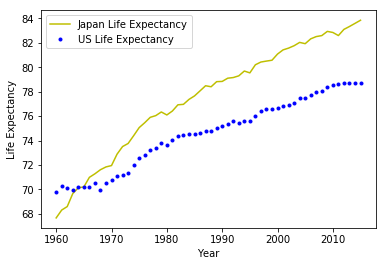

In [3]:
plt.figure(1)
plt.plot(year, country['Japan'], 'y-')
plt.plot(year, country['United_States'], 'b.')
plt.legend(['Japan Life Expectancy','US Life Expectancy'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('data/JapanLifeExpectancy.png')

<br>
**Plot USA and Japan Population Growth Comparision**
    - The example file is 1960-2017 population
    - Plot population in million
    - Plot population growth rate

In [4]:
data = pd.read_excel('data/Plot1/USALife.xlsx')
data[data.Country == 'USA']
us = data[data.Country == 'USA']
japan = data[data.Country == 'Japan']

<br>
**Plot with the top left corner showing le8**<br> - scientific notation, the number is too big

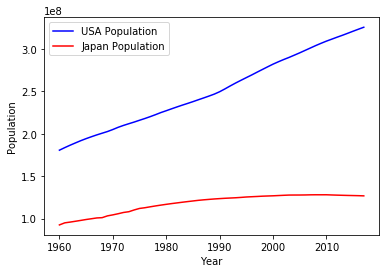

In [5]:
plt.plot(us.Year, us.Population, 'b')
plt.plot(japan.Year, japan.Population, 'r')
plt.legend(['USA Population', 'Japan Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()



<br>
**Plot in million and dot line**

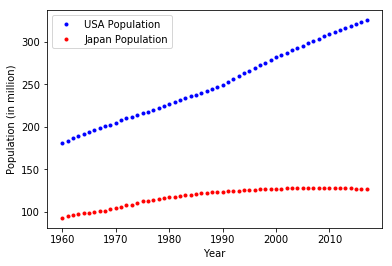

In [6]:
plt.plot(us.Year, us.Population / 10**6, 'b.')
plt.plot(japan.Year, japan.Population / 10**6, 'r.')
plt.legend(['USA Population', 'Japan Population'])
plt.xlabel('Year')
plt.ylabel('Population (in million)')
plt.show()

<br>
**Plot population growth rate - visiualize the growth**
    - Japan population growth rate is starting to be lower than USA from mid-1980
    - Take the first year 1960 as first year, then divide to the following year for growth rate
    - Based on the chart, we can see USA popluation grow faster pace than Japan from mid 1990s.

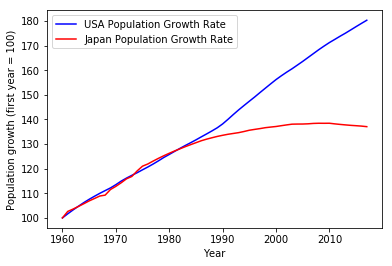

In [7]:
plt.plot(us.Year, us.Population / us.Population.iloc[0] * 100, 'b')
plt.plot(japan.Year, japan.Population / japan.Population.iloc[0] * 100, 'r')
plt.legend(['USA Population Growth Rate', 'Japan Population Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Population growth (first year = 100)')
plt.show()